In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial.distance import mahalanobis
from sklearn.svm import SVC
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import pairwise_distances
from sklearn.linear_model import LogisticRegression
from mpl_toolkits.mplot3d import Axes3D

In [23]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
val=pd.read_csv("val.csv")
train.drop(columns=["Unnamed: 0"],inplace=True)
test.drop(columns=["Unnamed: 0"],inplace=True)
val.drop(columns=["Unnamed: 0"],inplace=True)

In [24]:
scaler = StandardScaler()
x_train=train.drop(columns=["species"])
y_train=train["species"]

x_test=test.drop(columns=["species"])
y_test=test["species"]

x_val=val.drop(columns=["species"])
y_val=val["species"]

x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
x_val=scaler.transform(x_val)

In [25]:
svm_model_new=SVC(kernel="rbf",gamma=15,C=0.6)
svm_model_new.fit(x_train,y_train)
y_test_pred = svm_model_new.predict(x_test)  
conf_matrix = confusion_matrix(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='macro', zero_division=1)
recall = recall_score(y_test, y_test_pred, average='macro', zero_division=1)
print("the results on test data")
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

the results on test data
Confusion Matrix:
 [[96  0  0  0  0  0  0  0  0]
 [ 0 83  0  0  0  0  0  0  0]
 [ 0  0 80  0  0  0  0 13  0]
 [ 0  0  0 87  0  0  0  0  0]
 [ 0  0  0  0 95  0  0  0  0]
 [ 0  0  0  0  0 92  0  0  0]
 [ 0  0  0  0  0  0 83  0  0]
 [ 0  0 27  0  0  0  0 69  0]
 [ 0  0  0  0  0  0  0  0 91]]
Accuracy: 0.9509803921568627
Precision: 0.9543474406706685
Recall: 0.9532183393070489


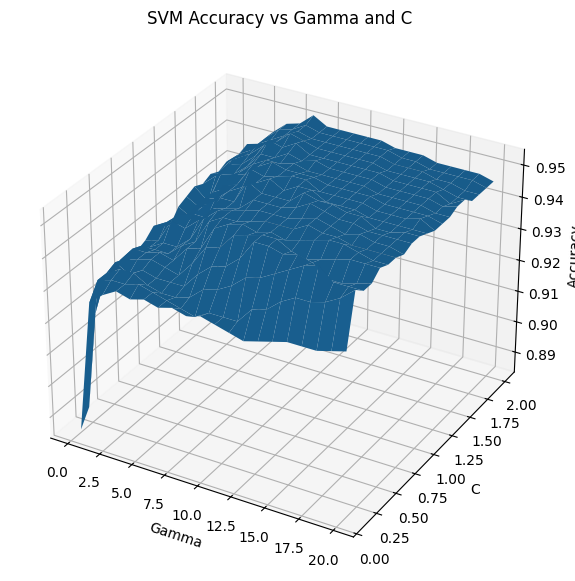

In [26]:
gamma_range = np.linspace(0.1, 20, 20)
C_range = np.linspace(0.1, 2, 20)

Gamma, C = np.meshgrid(gamma_range, C_range)
Accuracy = np.zeros_like(Gamma)


for i in range(Gamma.shape[0]):
    for j in range(Gamma.shape[1]):
        svm_model = SVC(kernel="rbf", gamma=Gamma[i, j], C=C[i, j])
        svm_model.fit(x_train, y_train)
        preds = svm_model.predict(x_test)
        Accuracy[i, j] = accuracy_score(y_test, preds)


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(Gamma, C, Accuracy)
ax.set_xlabel('Gamma')
ax.set_ylabel('C')
ax.set_zlabel('Accuracy')
ax.set_title('SVM Accuracy vs Gamma and C')
plt.savefig("SVM_accuracy_gamma_c", dpi=300, bbox_inches='tight')

plt.show()

### Best SVM

In [27]:
best_index = np.unravel_index(np.argmax(Accuracy, axis=None), Accuracy.shape)

# Get best gamma and C
best_gamma = Gamma[best_index]
best_C = C[best_index]
best_accuracy = Accuracy[best_index]

svm_model = SVC(kernel="rbf", gamma=best_gamma, C=best_C)
svm_model.fit(x_train, y_train)
y_test_pred = svm_model.predict(x_test)  
conf_matrix = confusion_matrix(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='macro', zero_division=1)
recall = recall_score(y_test, y_test_pred, average='macro', zero_division=1)
print("the results on test data")
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


the results on test data
Confusion Matrix:
 [[96  0  0  0  0  0  0  0  0]
 [ 0 83  0  0  0  0  0  0  0]
 [ 0  0 83  0  0  0  0 10  0]
 [ 0  0  0 87  0  0  0  0  0]
 [ 0  0  0  0 95  0  0  0  0]
 [ 0  0  0  0  0 92  0  0  0]
 [ 0  0  0  0  0  0 83  0  0]
 [ 0  0 28  0  0  0  0 68  0]
 [ 0  0  0  0  0  0  0  0 91]]
Accuracy: 0.9534313725490197
Precision: 0.9577269577269577
Recall: 0.9556451612903226
